In [49]:
import csv
import re
import pandas as pd
import pathlib
from pathlib import Path
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import numpy as np

 
dir = Path("../../data/arabica_data_cleaned.csv")
arabica_df = pd.read_csv(dir)
#unnamed column resulting from the "" column name counting the row.
arabica_df = arabica_df.loc[:, ~arabica_df.columns.str.contains('^Unnamed')]
arabica_df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## Drop some categorical columns
The dataset is rich in *meta data* (categorical), however we just want to keep "Country.of.Origin", "Producer", "Processing.Method" as meta and all data columns. How to drop all the rest?
While you're at it, let's rename the three meta columns we want to keep so they do not have dots but space in their name. 

[('Number.of.Bags', 1), ('Aroma', 70), ('Flavor', 43), ('Aftertaste', 85), ('Acidity', 25), ('Body', 30), ('Balance', 39), ('Uniformity', 183), ('Clean.Cup', 117), ('Sweetness', 93), ('Cupper.Points', 32), ('Total.Cup.Points', 74), ('Moisture', 293), ('Category.One.Defects', 200), ('Quakers', 94), ('Category.Two.Defects', 94), ('altitude_low_meters', 61), ('altitude_high_meters', 57), ('altitude_mean_meters', 61)]


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_13944/2971832901.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[mask_upper | mask_lower] = median


'\ni = 0\nfor column_name in arabica_reduced.columns:\n    \n    if i > 2:\n        \n        fig = plt.figure()\n        \n        plt.boxplot(arabica_reduced_cleaned[column_name])\n        \n    i = i + 1\n\n\n\ni = 0\nfor column_name in arabica_reduced.columns:\n    if i > 2:\n        fig, axs = plt.subplots(2,1)\n        axs[0].boxplot(arabica_reduced[column_name])\n        axs[0].set_title(column_name)\n        axs[1].boxplot(arabica_reduced_cleaned[column_name])\n        \n        \n    i = i + 1\n\n'

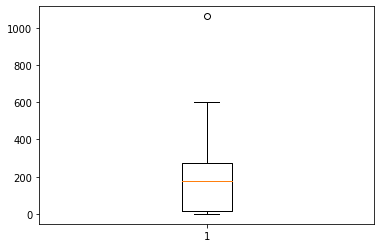

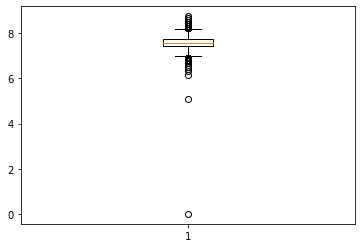

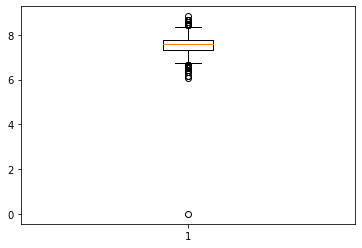

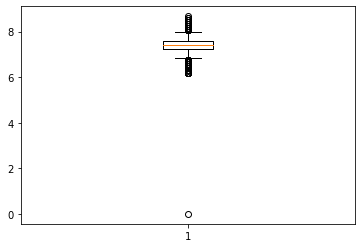

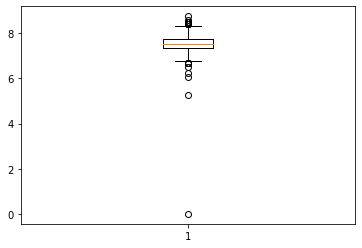

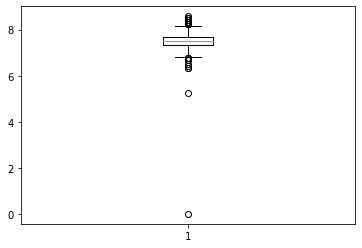

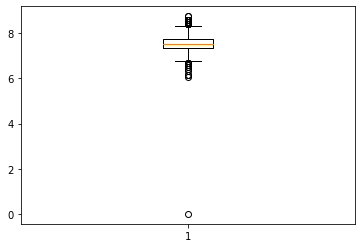

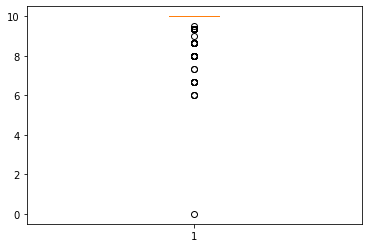

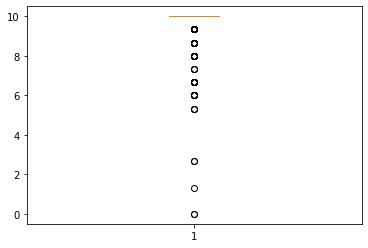

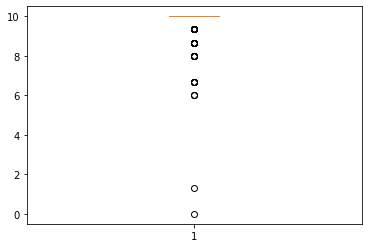

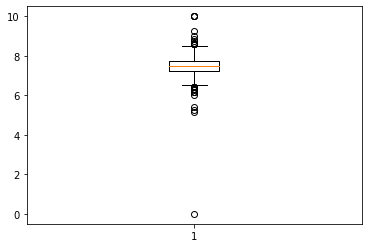

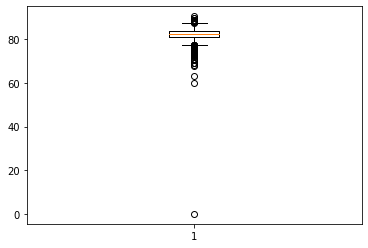

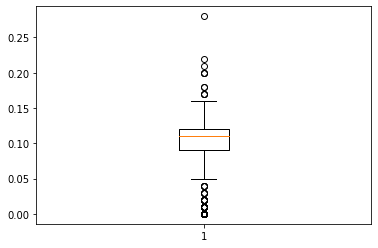

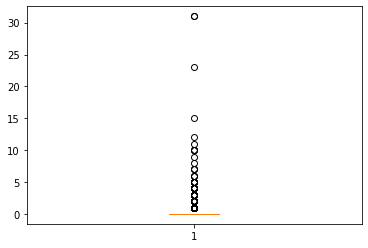

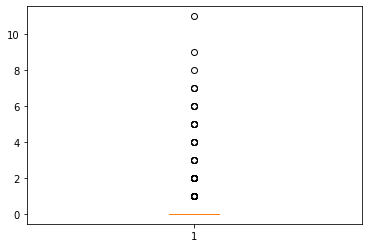

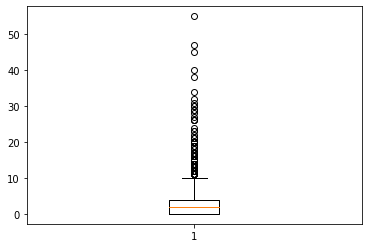

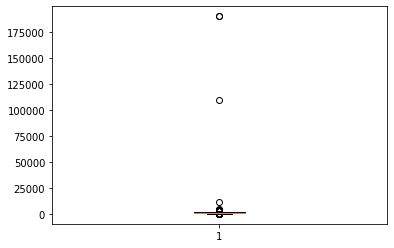

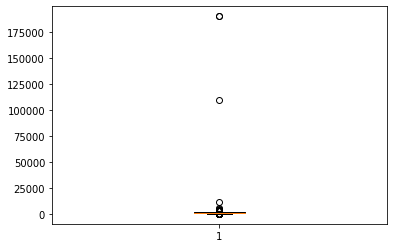

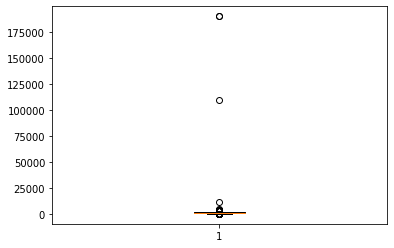

In [50]:
arabica_df_categorical = arabica_df[["Country.of.Origin","Producer","Processing.Method"]]
arabica_df_not_categorical = arabica_df.select_dtypes(include=["float64","int64"])
arabica_reduced = arabica_df_categorical.join(arabica_df_not_categorical)
arabica_reduced = arabica_reduced.rename(columns={"Country.of.Origin": "Country of Origin", "Producer": "Producer", "Processing.Method": "Processing Method"})

i = 0
for column_name in arabica_reduced.columns:
    if i > 2:
        #print(column_name)
        fig = plt.figure()
        plt.boxplot(arabica_reduced[column_name].dropna())
        
        
    i = i + 1

median_list = arabica_reduced.quantile().tolist()
quantile_25_list = arabica_reduced.quantile(q=0.25).tolist()
quantile_75_list = arabica_reduced.quantile(q=0.75).tolist()
inter_quartile_range_list = [q75 - q25 for (q75, q25) in zip(quantile_75_list, quantile_25_list)]
upper_bound_list = [q75 +(1.5*iqr) for (q75, iqr) in zip(quantile_75_list, inter_quartile_range_list)]
lower_bound_list = [q25 -(1.5*iqr) for (q25, iqr) in zip(quantile_25_list, inter_quartile_range_list)]

def append_3_zeros_to_front_of_list(list):
    for i in range(3):
        list.insert(0,0)
    return list

median_list = append_3_zeros_to_front_of_list(median_list)
lower_bound_list = append_3_zeros_to_front_of_list(lower_bound_list)
upper_bound_list = append_3_zeros_to_front_of_list(upper_bound_list) 


arabica_reduced_cleaned = arabica_reduced[["Country of Origin", "Producer", "Processing Method"]]

change_list =[]
i = 0
for (
    column_name,
    median,
    upper_bound,
    lower_bound) in zip(
        arabica_reduced.columns,
        median_list,
        upper_bound_list,
        lower_bound_list):
      
    if i > 2:
        column = arabica_reduced[column_name]
        mask_upper = column > upper_bound
        mask_lower = column < lower_bound
        change_list.append((column_name,sum(mask_upper | mask_lower)))
        column[mask_upper | mask_lower] = median
        to_join = arabica_reduced[column_name] = column
        
        arabica_reduced_cleaned = arabica_reduced_cleaned.join(to_join)

    i = i + 1

print(change_list)
'''
i = 0
for column_name in arabica_reduced.columns:
    
    if i > 2:
        
        fig = plt.figure()
        
        plt.boxplot(arabica_reduced_cleaned[column_name])
        
    i = i + 1



i = 0
for column_name in arabica_reduced.columns:
    if i > 2:
        fig, axs = plt.subplots(2,1)
        axs[0].boxplot(arabica_reduced[column_name])
        axs[0].set_title(column_name)
        axs[1].boxplot(arabica_reduced_cleaned[column_name])
        
        
    i = i + 1

'''


In [51]:
arabica_reduced_cleaned["altitude_mean_meters"].tolist()
arabica_reduced_cleaned["Quakers"].isna().sum()


1

In [52]:
arabica_reduced = arabica_reduced_cleaned
arabica_reduced_cleaned.head(20)


,Country of Origin,Producer,Processing Method,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,METAD PLC,Washed / Wet,300,7.58,7.58,7.42,7.50,7.50,7.50,...,10.0,7.50,82.50,0.12,0,0.0,0,1950.0,2200.0,2075.0
1,Ethiopia,METAD PLC,Washed / Wet,300,7.58,7.58,7.42,7.50,7.50,7.50,...,10.0,7.50,82.50,0.12,0,0.0,1,1950.0,2200.0,2075.0
2,Guatemala,NaN,NaN,5,7.58,7.58,7.42,7.50,7.50,7.50,...,10.0,7.50,82.50,0.11,0,0.0,0,1600.0,1800.0,1700.0
3,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Natural / Dry,320,8.17,7.58,7.42,7.50,7.50,8.25,...,10.0,7.50,82.50,0.11,0,0.0,2,1800.0,2200.0,2000.0
4,Ethiopia,METAD PLC,Washed / Wet,300,7.58,7.58,7.42,7.50,7.50,8.33,...,10.0,7.50,82.50,0.12,0,0.0,2,1950.0,2200.0,2075.0
5,Brazil,NaN,Natural / Dry,100,7.58,7.58,7.42,7.50,7.50,8.33,...,10.0,8.33,82.50,0.11,0,0.0,1,NaN,NaN,NaN
6,Peru,HVC,Washed / Wet,100,7.58,7.58,7.42,7.50,7.50,8.25,...,10.0,8.50,82.50,0.11,0,0.0,0,NaN,NaN,NaN
7,Ethiopia,Bazen Agricultural & Industrial Dev't Plc,NaN,300,7.58,8.33,7.42,7.50,7.50,7.50,...,10.0,7.50,82.50,0.11,0,0.0,0,1570.0,1700.0,1635.0
8,Ethiopia,Bazen Agricultural & Industrial Dev't Plc,NaN,300,7.58,7.58,7.42,7.50,7.50,7.50,...,10.0,7.50,82.50,0.11,0,0.0,0,1570.0,1700.0,1635.0
9,Ethiopia,Diamond Enterprise Plc,Natural / Dry,50,8.08,7.58,7.42,7.50,7.67,7.50,...,10.0,8.50,82.50,0.10,0,0.0,4,1795.0,1850.0,1822.5


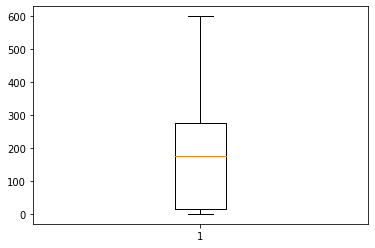

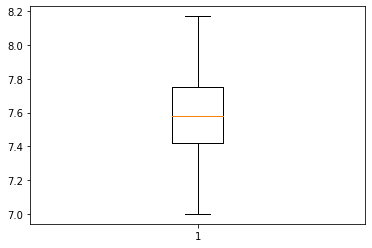

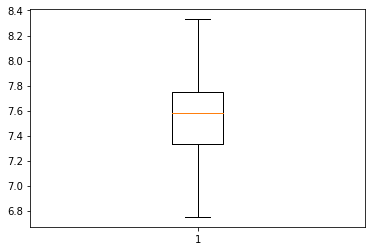

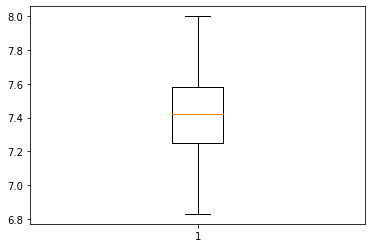

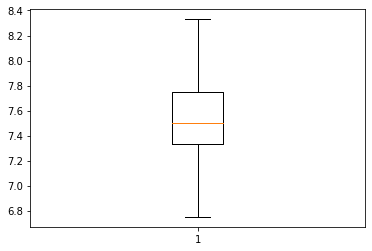

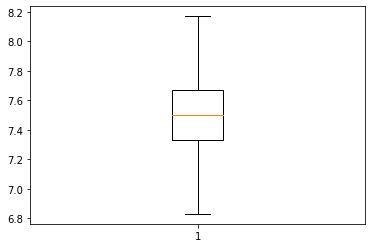

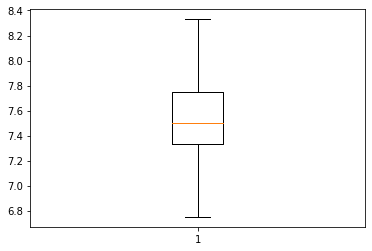

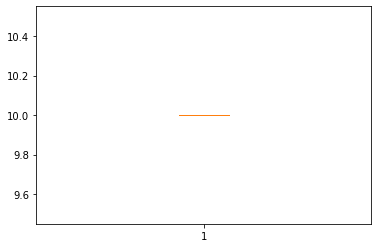

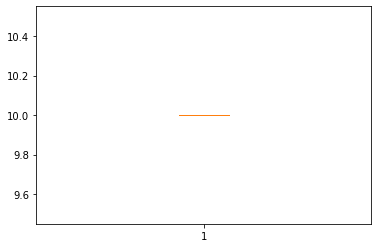

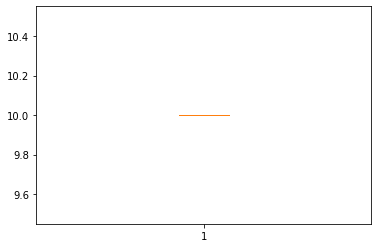

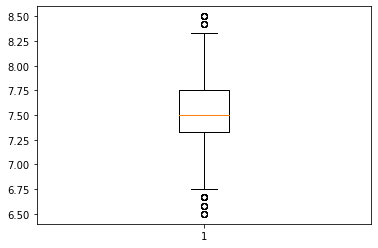

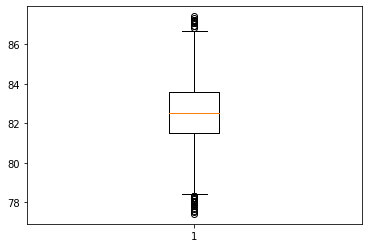

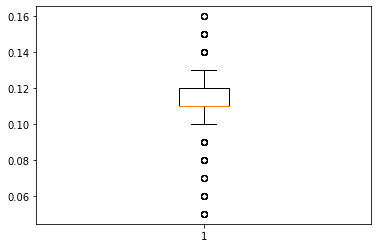

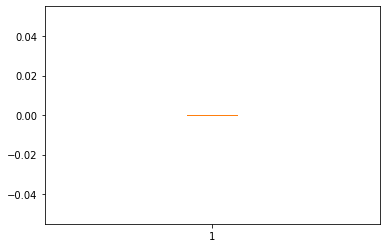

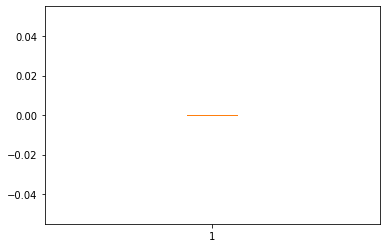

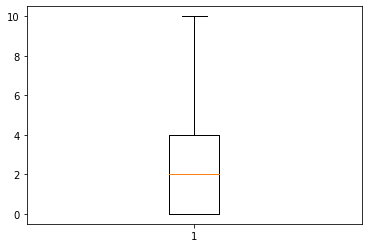

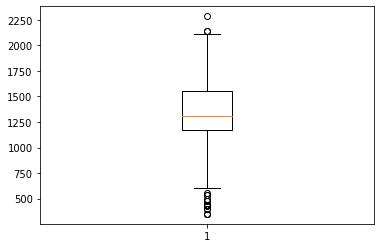

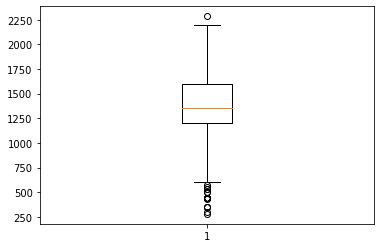

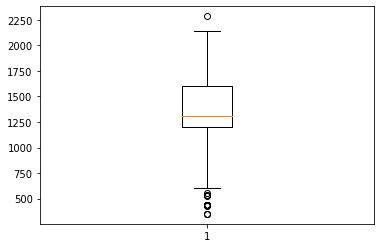

In [53]:
i = 0
for column_name in arabica_reduced_cleaned.columns:
    if i > 2:
        #print(column_name)
        fig = plt.figure()
        plt.boxplot(arabica_reduced_cleaned[column_name].dropna())
        
        
    i = i + 1

In [54]:
unique_country_list = arabica_reduced_cleaned["Country of Origin"].dropna().unique()
country_list = arabica_reduced_cleaned["Country of Origin"].tolist()
number_of_entries_list = []
for country in unique_country_list:
    count = country_list.count(country)
    number_of_entries_list.append(count)
entries_30 = []
entries_10 = []

for i in range(len(unique_country_list)):
    if number_of_entries_list[i] >= 30:
        tupel = (unique_country_list[i], number_of_entries_list[i])
        entries_30.append(tupel)
    if number_of_entries_list[i] <= 10:
        tupel = (unique_country_list[i], number_of_entries_list[i])
        entries_10.append(tupel)
print(entries_10)
print(entries_30)



[('Peru', 10), ('United States', 8), ('Panama', 4), ('Papua New Guinea', 1), ('Japan', 1), ('Ecuador', 1), ('United States (Puerto Rico)', 4), ('Haiti', 6), ('Burundi', 2), ('Vietnam', 7), ('Philippines', 5), ('Rwanda', 1), ('Laos', 3), ('Zambia', 1), ('Myanmar', 8), ('Mauritius', 1), ('Cote d?Ivoire', 1), ('India', 1)]
[('Ethiopia', 44), ('Guatemala', 181), ('Brazil', 132), ('United States (Hawaii)', 73), ('Costa Rica', 51), ('Mexico', 236), ('Honduras', 53), ('Taiwan', 75), ('Tanzania, United Republic Of', 40), ('Thailand', 32), ('Colombia', 183)]


In [55]:
def get_number_of_entries_df (property):
    unique_property_list = arabica_reduced_cleaned[property].dropna().unique()
    property_list = arabica_reduced_cleaned[property].tolist()
    number_of_entries_list = []
    for unique_property in unique_property_list:
        count = property_list.count(unique_property)
        number_of_entries_list.append(count)
    df = pd.DataFrame({property: unique_property_list, "Number_of_Entries":number_of_entries_list})
    return df

country_entries = get_number_of_entries_df("Country of Origin")
producer_entries = get_number_of_entries_df("Producer")
processing_method_entries = get_number_of_entries_df("Processing Method")











In [56]:
print("Countries with more than 30 entries:")
print(country_entries[country_entries.Number_of_Entries > 30])
print("\n")

Countries with more than 30 entries:
               Country of Origin  Number_of_Entries
0                       Ethiopia                 44
1                      Guatemala                181
2                         Brazil                132
5         United States (Hawaii)                 73
8                     Costa Rica                 51
9                         Mexico                236
11                      Honduras                 53
12                        Taiwan                 75
14  Tanzania, United Republic Of                 40
16                      Thailand                 32
17                      Colombia                183




In [57]:
print("Countries with less than 10 entries:")
print(country_entries[country_entries.Number_of_Entries < 10])
print("\n")

Countries with less than 10 entries:
              Country of Origin  Number_of_Entries
4                 United States                  8
18                       Panama                  4
19             Papua New Guinea                  1
21                        Japan                  1
22                      Ecuador                  1
23  United States (Puerto Rico)                  4
24                        Haiti                  6
25                      Burundi                  2
26                      Vietnam                  7
27                  Philippines                  5
28                       Rwanda                  1
30                         Laos                  3
31                       Zambia                  1
32                      Myanmar                  8
33                    Mauritius                  1
34                Cote d?Ivoire                  1
35                        India                  1




In [58]:
print("Producer with most entries:")
print(producer_entries[producer_entries.Number_of_Entries == producer_entries.Number_of_Entries.max()])
print("\n")

Producer with most entries:
    Producer  Number_of_Entries
70  La Plata                 30




In [59]:
print("Most common Processing Method")
print(processing_method_entries[processing_method_entries.Number_of_Entries == processing_method_entries.Number_of_Entries.max()])
print("\n")

Most common Processing Method
  Processing Method  Number_of_Entries
0      Washed / Wet                812




In [60]:
print("Least common Processing Method")
print(processing_method_entries[processing_method_entries.Number_of_Entries == processing_method_entries.Number_of_Entries.min()])

Least common Processing Method
        Processing Method  Number_of_Entries
2  Pulped natural / honey                 14
